<a href="https://colab.research.google.com/github/lakso-ycy/B5026221120/blob/main/KNN_PAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORT & READ DATA***

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'winequality-red.csv'  # Replace with your file path on Colab
# Specify the delimiter as ';' to correctly parse the columns
df = pd.read_csv(file_path, delimiter=';') # The delimiter was not specified and likely caused incorrect parsing

# Display the first few rows
print("Data Sample:")
df

Data Sample:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# ***KLASIFIKASI & NORMALISASI DATA***

In [ ]:
# Check the data info and types
print("\nData Info:")
df.info()

# Check for any missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nData Description:")
df.describe()
print(df.shape)



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar     

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Pisahkan fitur dan target
X = df.drop('quality', axis=1)  # Fitur
y = df['quality'].apply(lambda x: 1 if x >= 5 else 0)  # Target

# Normalisasi menggunakan Min-Max Scaling
# Untuk merubah rentang ke [0,1] supaya menyamakan skala variable, mengurangi bias data, dan meningkatkan akurasi
# Normalisasi ada hubungannya dengan pengaruh K

scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Data Setelah Normalisasi (Min-Max Scaling):")
print(X_normalized.head())

Data Setelah Normalisasi (Min-Max Scaling):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol 

# ***FEATURE SELECTION***

Univariate Selection (Chi2 Scores):
                      Chi2 Score
alcohol                26.085325
volatile acidity        8.891043
total sulfur dioxide    8.124311
citric acid             5.666703
sulphates               3.984401
density                 1.584643
fixed acidity           1.042185
chlorides               0.938810
free sulfur dioxide     0.631406
residual sugar          0.000620
pH                      0.000559

Feature Importance (Random Forest):
                      Importance
alcohol                 0.256275
sulphates               0.119053
volatile acidity        0.105251
total sulfur dioxide    0.101145
chlorides               0.075015
pH                      0.066352
density                 0.062122
fixed acidity           0.059073
residual sugar          0.052507
free sulfur dioxide     0.052259
citric acid             0.050948

Correlation Matrix Heatmap:


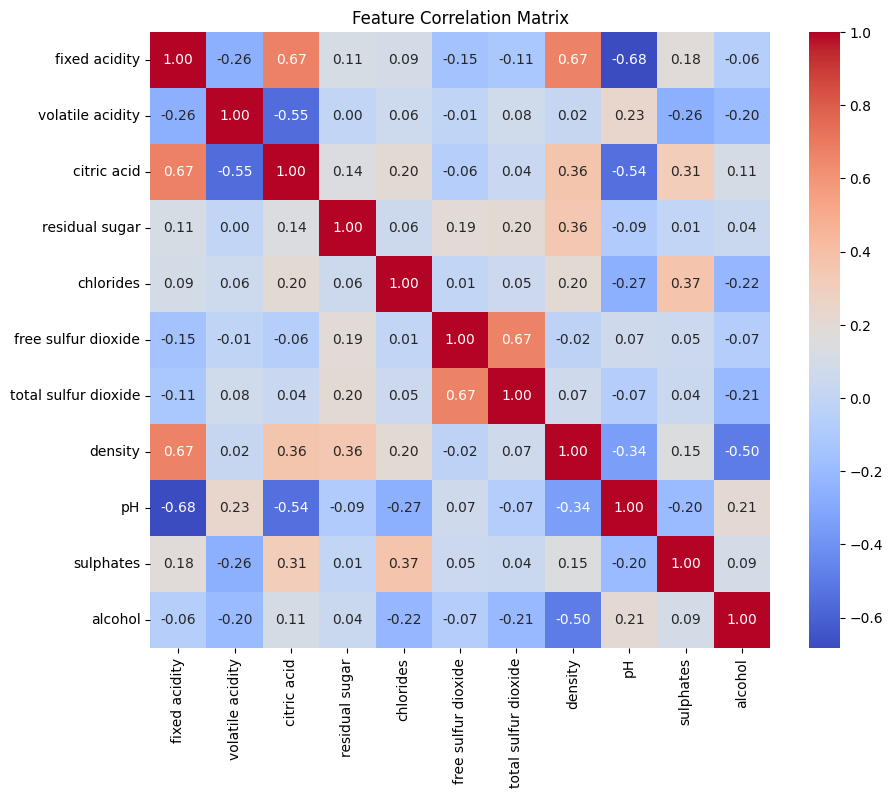

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load Diabetes dataset
data = df
X = df.drop('quality', axis=1) # Separate features
y = df['quality'] # Separate target variable
y = y.apply(lambda x: 1 if x >= 6 else 0)

# Chi-Square Test untuk feature selection
def univariate_selection(X, y):
    selector = SelectKBest(score_func=chi2, k='all')
    selector.fit(X, y)
    scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Chi2 Score'])
    return scores.sort_values(by='Chi2 Score', ascending=False)

univariate_scores = univariate_selection(X_normalized, y)
print("Univariate Selection (Chi2 Scores):")
print(univariate_scores)

# Random Forest untuk feature importance
def feature_importance(X, y):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
    return importances.sort_values(by='Importance', ascending=False)

feature_importances = feature_importance(X_normalized, y)
print("\nFeature Importance (Random Forest):")
print(feature_importances)

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix untuk melihat hubungan antar fitur
def correlation_matrix(X):
    corr = X.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.show()

print("\nCorrelation Matrix Heatmap:")
correlation_matrix(X_normalized)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

df_KNN = df[['alcohol', 'sulphates', 'quality']]
df_KNN.head()


,alcohol,sulphates,quality
0,9.4,0.56,5
1,9.8,0.68,5
2,9.8,0.65,5
3,9.8,0.58,6
4,9.4,0.56,5


# ***SPLIT DATA***

In [ ]:
# Access the data and target from the DataFrame directly
# X_normalized = data[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'total sulfur dioxide']]
# y = data['quality']  # Target: 'quality'

# - korelasi antara fitur itu berpengaruh
# - bisa jadi overfitting karena data terlalu sederhana setelah di normalisasi
# - fitur bisa jadi sensitif terhadap skala data
# - semakin sedikit fitur yang dipilih, data yang dilatih semakin kecil

# Split the dataset into training and testing sets
# Menggunakan data yang telah dinormalisasi
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# ***N-FOLD VALIDATION***

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define N-fold cross-validation
n_splits = 10  # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
knn = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(knn, X_normalized, y, cv=kf, scoring='accuracy')  # Use accuracy as scoring metric

# Print results
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of accuracy: {np.std(cv_scores):.2f}")


Cross-validation scores for each fold: [0.725     0.70625   0.725     0.7       0.69375   0.725     0.7875
 0.7125    0.775     0.7672956]
Mean accuracy: 0.73
Standard deviation of accuracy: 0.03


# ***BEST K & TESTING***

In [ ]:
# Inisialisasi variabel untuk menyimpan hasil terbaik
best_accuracy = 0
best_k = 0
reports = []

# Melakukan iterasi untuk nilai k dari
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Menggunakan X_train yang sudah dinormalisasi
    y_pred = knn.predict(X_test)  # Menggunakan X_test yang sudah dinormalisasi

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    reports.append(classification_report(y_test, y_pred))

    # Memeriksa apakah akurasi saat ini adalah yang terbaik
    if best_accuracy <= accuracy:
        best_accuracy = accuracy
        best_k = k

# Menampilkan hasil terbaik
print(f'Best Accuracy: {best_accuracy * 100:.2f}% with K: {best_k}')

Best Accuracy: 75.00% with K: 1


# ***DATA VISUALIZATION***

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-10-51fdefc9ed5e>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=cmap(i), label=f'Kelas {j}')


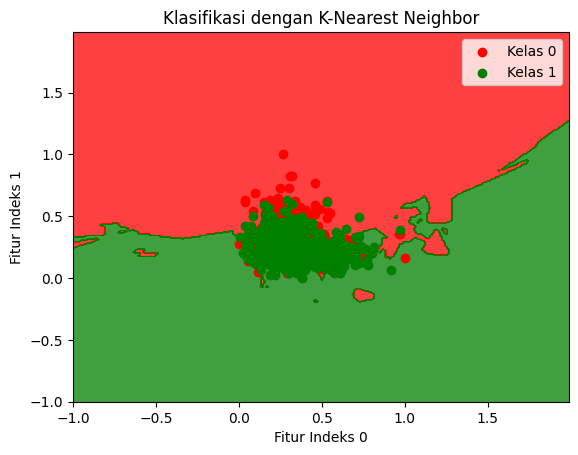

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Menyiapkan data (x_set dan y_set)
x_set, y_set = X_train, y_train
x_set = x_set.values  # Mengonversi x_set menjadi array NumPy jika diperlukan

# Membuat meshgrid untuk visualisasi batas keputusan
x1, x2 = np.meshgrid(np.arange(x_set[:, 0].min() - 1, x_set[:, 0].max() + 1, 0.01),
                     np.arange(x_set[:, 1].min() - 1, x_set[:, 1].max() + 1, 0.01))

# Menghitung rata-rata untuk fitur lainnya
mean_features = x_set[:, 2:].mean(axis=0)

# Fungsi untuk membuat data point dengan semua fitur (11 fitur)
def create_data_point(x1_val, x2_val):
    return np.concatenate(([x1_val, x2_val], mean_features)).reshape(1, -1)

# Memprediksi untuk seluruh grid
prediction_data = np.array([create_data_point(x1_val, x2_val) for x1_val, x2_val in zip(x1.ravel(), x2.ravel())])
predictions = knn.predict(prediction_data.reshape(-1, 11))

# Visualisasi
cmap = ListedColormap(['red', 'green'])  # Colormap untuk kelas
plt.contourf(x1, x2, predictions.reshape(x1.shape), alpha=0.75, cmap=cmap)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Menampilkan titik data asli
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=cmap(i), label=f'Kelas {j}')

plt.title('Klasifikasi dengan K-Nearest Neighbor')
plt.xlabel('Fitur Indeks 0')
plt.ylabel('Fitur Indeks 1')
plt.legend()
plt.show()

# ***EVALUATING MODEL***

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[104  37]
 [ 54 125]]


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report # Import roc_auc_score
# Evaluasi model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Hitung nilai AUC
try:
    # Menggunakan predict_proba untuk mendapatkan probabilitas
    y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f"\nAUC: {auc_score:.2f}")
except AttributeError:
    print("\nModel tidak mendukung predict_proba, sehingga nilai AUC tidak dapat dihitung.")


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       141
           1       0.76      0.81      0.78       179

    accuracy                           0.75       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.75      0.75       320


AUC: 0.74


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Inisialisasi variabel untuk menyimpan hasil
results = []

# Hitung metrik untuk setiap K
for k in range(1, 11):  # K mulai dari 1 hingga 10
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Hitung metrik
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)

    # Simpan hasil dalam dictionary
    results.append({
        'K': k,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })

# Tampilkan hasil di console
for result in results:
    print(f"K={result['K']}:")
    print(f"  Precision: {result['Precision']:.2f}")
    print(f"  Recall: {result['Recall']:.2f}")
    print(f"  F1-Score: {result['F1-Score']:.2f}")
    print(f"  Accuracy: {result['Accuracy']:.2f}")
    print("-" * 30)

K=1:
  Precision: 0.76
  Recall: 0.81
  F1-Score: 0.78
  Accuracy: 0.75
------------------------------
K=2:
  Precision: 0.83
  Recall: 0.60
  F1-Score: 0.70
  Accuracy: 0.71
------------------------------
K=3:
  Precision: 0.74
  Recall: 0.76
  F1-Score: 0.75
  Accuracy: 0.72
------------------------------
K=4:
  Precision: 0.77
  Recall: 0.63
  F1-Score: 0.69
  Accuracy: 0.69
------------------------------
K=5:
  Precision: 0.71
  Recall: 0.73
  F1-Score: 0.72
  Accuracy: 0.68
------------------------------
K=6:
  Precision: 0.77
  Recall: 0.64
  F1-Score: 0.70
  Accuracy: 0.69
------------------------------
K=7:
  Precision: 0.74
  Recall: 0.75
  F1-Score: 0.74
  Accuracy: 0.71
------------------------------
K=8:
  Precision: 0.78
  Recall: 0.69
  F1-Score: 0.74
  Accuracy: 0.72
------------------------------
K=9:
  Precision: 0.73
  Recall: 0.73
  F1-Score: 0.73
  Accuracy: 0.70
------------------------------
K=10:
  Precision: 0.77
  Recall: 0.70
  F1-Score: 0.73
  Accuracy: 0.72


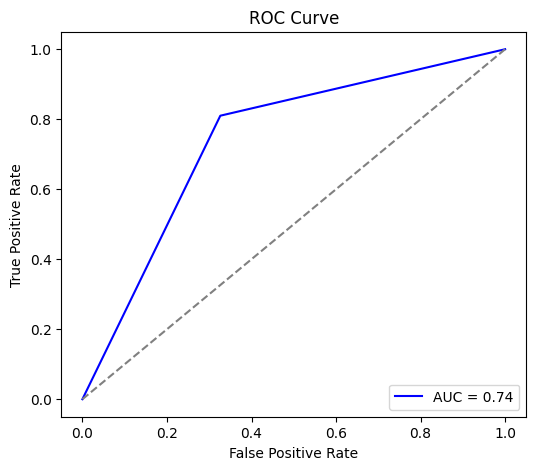

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# ***EXPORT TO EXCEL***

In [ ]:
# Export hasil ke Excel
df_results = pd.DataFrame(results)  # Mengonversi list of dicts ke DataFrame
output_path = "hasil all variable score 80:20.xlsx"    # Nama file output
df_results.to_excel(output_path, index=False)

print(f"Results saved to {output_path}")